In [2]:
from pathlib import Path
from models.transfersdataset import TransfersDataset
from models.catboost import CatBoost
import warnings

In [3]:
td = TransfersDataset(Path.cwd()/'../prepped/final-2.csv')
td.encode_last_positions()
td.encode()
td.drop()

In [4]:
m = CatBoost(td.data, [])
m.train_test_split()
m.scale()
m.tune_hp()
m.train()
m.inverse_scale()
m.score(thresh=10)
m.plot_predictions()

  0%|          | 0/50 [00:00<?, ?it/s]

Best parameters: {'iterations': 4577, 'learning_rate': 0.03346111873608059, 'depth': 7, 'subsample': 0.5848308386428854, 'colsample_bylevel': 0.55213351501385, 'min_data_in_leaf': 61}
thresh = 10
mae: 2.772375433449747
mape: 0.5100382441044997
mae_below_thresh: 1.536414673515217
mape_above_thresh: 0.261908133089534


In [5]:
m.top_n_predictions(n=20, criteria='error_pct')

,name,age,season,country_from,league_from,club_from,country_to,league_to,club_to,window,marketval,marketval_0,fee,marketval_0,marketval_0_pred,error,error_pct
2007,Nedim Bajrami,24,23/24,Italy,IT1,FC Empoli,Italy,IT1,US Sassuolo,1,7.5,6.0,6.00,6.0,5.999587,0.000413,0.000069
1330,Calvin Bassey,22,22/23,Scotland,SC1,Rangers FC,Netherlands,NL1,Ajax Amsterdam,1,10.0,15.0,23.00,15.0,15.018734,0.018734,0.001249
2065,Junior Messias,32,23/24,Italy,IT1,AC Milan,Italy,IT1,Genoa CFC,0,4.5,3.0,1.50,3.0,2.991963,0.008037,0.002679
51,Leonardo Spinazzola,26,19/20,Italy,IT1,Juventus FC,Italy,IT1,AS Roma,1,15.0,14.5,29.50,14.5,14.456476,0.043524,0.003002
981,Ismail Jakobs,21,21/22,Germany,L1,1.FC Köln,France,FR1,AS Monaco,1,7.0,7.0,6.50,7.0,6.972907,0.027093,0.003870
1860,Hamed Junior Traorè,23,23/24,Italy,IT1,US Sassuolo,England,GB1,AFC Bournemouth,1,22.0,18.0,25.62,18.0,17.901950,0.098050,0.005447
1382,Emerson,28,22/23,England,GB1,Chelsea FC,England,GB1,West Ham United,1,14.0,12.0,15.40,12.0,12.091468,0.091468,0.007622
1670,Mbaye Diagne,30,22/23,Türkiye,TR1,Galatasaray,Türkiye,TR1,Fatih Karagümrük,1,1.7,2.2,0.00,2.2,2.181600,0.018400,0.008364
1374,Brian Brobbey,20,22/23,Germany,L1,RB Leipzig,Netherlands,NL1,Ajax Amsterdam,1,9.0,12.0,16.35,12.0,11.884990,0.115010,0.009584
1859,Hamed Junior Traorè,23,23/24,Italy,IT1,US Sassuolo,England,GB1,AFC Bournemouth,1,22.0,18.0,25.62,18.0,17.806000,0.194000,0.010778


In [6]:
m.top_n_predictions(20)

,name,age,season,country_from,league_from,club_from,country_to,league_to,club_to,window,marketval,marketval_0,fee,marketval_0,marketval_0_pred,error,error_pct
2007,Nedim Bajrami,24,23/24,Italy,IT1,FC Empoli,Italy,IT1,US Sassuolo,1,7.5,6.0,6.00,6.0,5.999587,0.000413,0.000069
2065,Junior Messias,32,23/24,Italy,IT1,AC Milan,Italy,IT1,Genoa CFC,0,4.5,3.0,1.50,3.0,2.991963,0.008037,0.002679
1621,Bas Dost,33,22/23,Belgium,BE1,Club Brugge KV,Netherlands,NL1,FC Utrecht,1,2.5,1.3,0.00,1.3,1.283649,0.016351,0.012578
1670,Mbaye Diagne,30,22/23,Türkiye,TR1,Galatasaray,Türkiye,TR1,Fatih Karagümrük,1,1.7,2.2,0.00,2.2,2.181600,0.018400,0.008364
1330,Calvin Bassey,22,22/23,Scotland,SC1,Rangers FC,Netherlands,NL1,Ajax Amsterdam,1,10.0,15.0,23.00,15.0,15.018734,0.018734,0.001249
981,Ismail Jakobs,21,21/22,Germany,L1,1.FC Köln,France,FR1,AS Monaco,1,7.0,7.0,6.50,7.0,6.972907,0.027093,0.003870
51,Leonardo Spinazzola,26,19/20,Italy,IT1,Juventus FC,Italy,IT1,AS Roma,1,15.0,14.5,29.50,14.5,14.456476,0.043524,0.003002
1780,Davie Selke,27,22/23,Germany,L1,Hertha BSC,Germany,L1,1.FC Köln,0,1.8,2.5,0.00,2.5,2.557180,0.057180,0.022872
1550,Michal Sadílek,23,22/23,Netherlands,NL1,PSV Eindhoven,Netherlands,NL1,Twente Enschede FC,1,4.0,4.0,1.50,4.0,4.057675,0.057675,0.014419
1050,Dmitriy Chistyakov,27,21/22,Russia,RU1,FK Rostov,Russia,RU1,Zenit St. Petersburg,1,2.8,4.0,3.25,4.0,3.938830,0.061170,0.015293


In [7]:
m.top_n_predictions(20, worst=True)

,name,age,season,country_from,league_from,club_from,country_to,league_to,club_to,window,marketval,marketval_0,fee,marketval_0,marketval_0_pred,error,error_pct
121,Diego Carlos,26,19/20,France,FR1,FC Nantes,Spain,ES1,Sevilla FC,1,13.0,50.0,15.00,50.0,18.812307,31.187693,0.623754
508,Emiliano Martínez,28,20/21,England,GB1,Arsenal FC,England,GB1,Aston Villa,1,8.0,35.0,17.40,35.0,10.110151,24.889849,0.711139
1454,Loïs Openda,22,22/23,Belgium,BE1,Club Brugge KV,France,FR1,RC Lens,1,7.5,35.0,15.39,35.0,12.178364,22.821636,0.652047
1316,Morgan Gibbs-White,22,22/23,England,GB1,Wolverhampton Wanderers,England,GB1,Nottingham Forest,1,11.0,40.0,29.50,40.0,18.892448,21.107552,0.527689
1718,Leandro Trossard,28,22/23,England,GB1,Brighton & Hove Albion,England,GB1,Arsenal FC,0,20.0,35.0,24.00,35.0,14.452544,20.547456,0.587070
44,Marcos Llorente,24,19/20,Spain,ES1,Real Madrid,Spain,ES1,Atlético de Madrid,1,20.0,40.0,30.00,40.0,19.841766,20.158234,0.503956
73,Theo Hernández,21,19/20,Spain,ES1,Real Madrid,Italy,IT1,AC Milan,1,15.0,32.0,22.80,32.0,13.884262,18.115738,0.566117
1271,Antony,22,22/23,Netherlands,NL1,Ajax Amsterdam,England,GB1,Manchester United,1,35.0,60.0,95.00,60.0,44.439685,15.560315,0.259339
1812,Sandro Tonali,23,23/24,Italy,IT1,AC Milan,England,GB1,Newcastle United,1,50.0,40.0,64.00,40.0,55.132842,15.132842,0.378321
543,Ridle Baku,22,20/21,Germany,L1,1.FSV Mainz 05,Germany,L1,VfL Wolfsburg,1,7.0,25.0,10.00,25.0,10.533869,14.466131,0.578645


In [8]:
m.calculate_effectiveness()
t = m.predictions.dropna()
t.eff_true.corr(t.eff_pred)

0.9224010071442738

In [9]:
m.predictions

,name,age,season,country_from,league_from,club_from,country_to,league_to,club_to,window,...,marketval_0,fee,marketval_0,marketval_0_pred,error,error_pct,age_coef,inflation,eff_true,eff_pred
0,Christopher Nkunku,21,19/20,France,FR1,Paris Saint-Germain,Germany,L1,RB Leipzig,1,...,33.00,19.50,33.00,18.653339,14.346661,0.434747,0.451151,-0.078351,-0.139432,-0.432047
1,Salih Özcan,24,22/23,Germany,L1,1.FC Köln,Germany,L1,Borussia Dortmund,1,...,13.00,5.00,13.00,11.582094,1.417906,0.109070,0.670855,0.194958,0.088395,0.057779
2,Ansgar Knauff,21,23/24,Germany,L1,Borussia Dortmund,Germany,L1,Eintracht Frankfurt,1,...,8.00,5.00,8.00,10.336074,2.336074,0.292009,0.451151,NaN,NaN,NaN
3,Moritz Jenz,24,23/24,France,FR1,FC Lorient,Germany,L1,VfL Wolfsburg,1,...,7.50,8.00,7.50,8.620242,1.120242,0.149366,0.670855,NaN,NaN,NaN
4,Ibrahima Konaté,22,21/22,Germany,L1,RB Leipzig,England,GB1,Liverpool FC,1,...,40.00,40.00,40.00,35.850741,4.149259,0.103731,0.531726,0.199843,-0.318193,-0.344461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Alexander Sørloth,27,23/24,Germany,L1,RB Leipzig,Spain,ES1,Villarreal CF,1,...,14.00,10.00,14.00,12.817308,1.182692,0.084478,0.866515,NaN,NaN,NaN
441,Héctor Bellerín,28,23/24,Portugal,PO1,Sporting CP,Spain,ES1,Real Betis Balompié,1,...,7.00,0.00,7.00,5.361198,1.638802,0.234115,0.912789,NaN,NaN,NaN
442,Mustafa Pektemek,31,19/20,Türkiye,TR1,Kasimpasa,Türkiye,TR1,Alanyaspor,0,...,0.45,0.00,0.45,1.233480,0.783480,1.741066,1.196456,-0.078351,0.649085,1.779184
443,Emerson Royal,22,21/22,Spain,ES1,Real Betis Balompié,Spain,ES1,FC Barcelona,1,...,25.00,14.00,25.00,21.643669,3.356331,0.134253,0.531726,0.199843,-0.058419,-0.088167


/var/folders/jm/4ddznsn94j7_pznhvk_1rwlw0000gn/T/ipykernel_53028/3227918393.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jm/4ddznsn94j7_pznhvk_1rwlw0000gn/T/ipykernel_53028/3227918393.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='eff', ylabel='Count'>

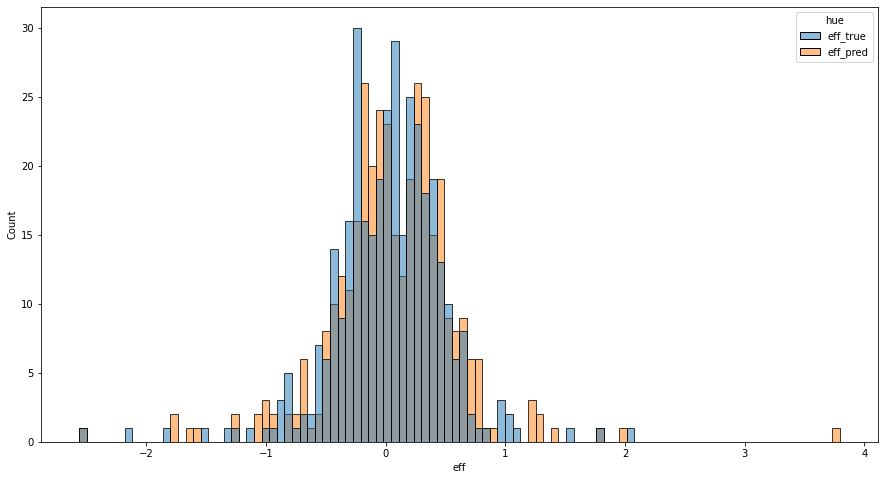

In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

t1 = m.predictions[['eff_true']]
t1['hue'] = 'eff_true'
t2 = m.predictions[['eff_pred']]
t2['hue'] = 'eff_pred'

t = pd.concat([t1, t2])
t.columns = ['eff', 'hue', 't2']
t.eff = t.eff.fillna(t.t2)
t = t.dropna(subset=['eff']).reset_index(drop=True)
t = t[abs(t.eff) < 5]

plt.figure(figsize=(15, 8))
sns.histplot(data=t, x='eff', hue='hue', bins=100)

,eff,hue,t2
0,-0.139432,eff_true,NaN
1,0.088395,eff_true,NaN
4,-0.318193,eff_true,NaN
5,0.455417,eff_true,NaN
6,0.186373,eff_true,NaN
...,...,...,...
437,-0.075597,eff_pred,-0.075597
438,-0.033424,eff_pred,-0.033424
442,1.779184,eff_pred,1.779184
443,-0.088167,eff_pred,-0.088167


In [36]:
m.top_n_predictions(n=20, criteria='error_pct').round(3).to_csv('top20.csv', index=False)